In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
import numpy as np
from collections import Counter

sys.path.append('../')

from utils import generate_dataset_for_classification
from unsupervised.clustering import Hierarchical

# plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-pastel')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


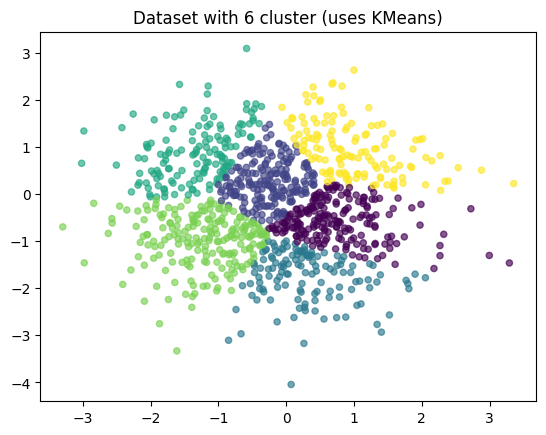

In [28]:
X, y = generate_dataset_for_classification(1000, 2, 6, center_box=(-1,1), random_state=2)
plt.title(f"Dataset with 6 cluster (uses KMeans)")
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.65, s=20)
plt.show()

#### Hierarchical Clustering

In [13]:
K = 3
assert K <= 10, "K must be less than 10"
hierarchical = Hierarchical(linkage='ward')
y_pred = hierarchical.fit_predict(X, K)

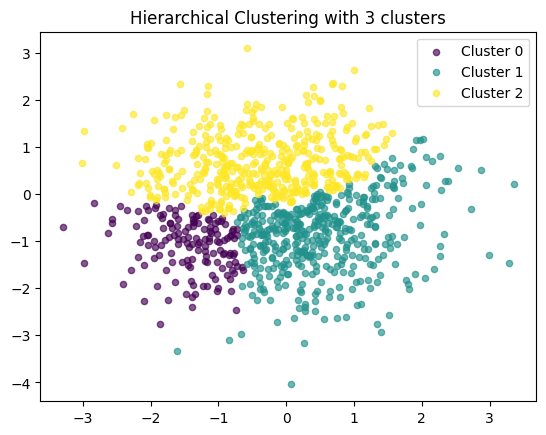

In [26]:
clusters = hierarchical.clusters
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, K)))
for i, cluster in enumerate(clusters):
    dp = hierarchical.X[clusters[cluster]]
    color = np.ones((dp.shape[0], 1)) * i
    plt.scatter(dp[:,0], dp[:,1] , label="Cluster {}".format(cluster), color=cmap(i), alpha=0.65, s=20)
plt.legend()
plt.title(f"Hierarchical Clustering with {K} clusters")
plt.show()